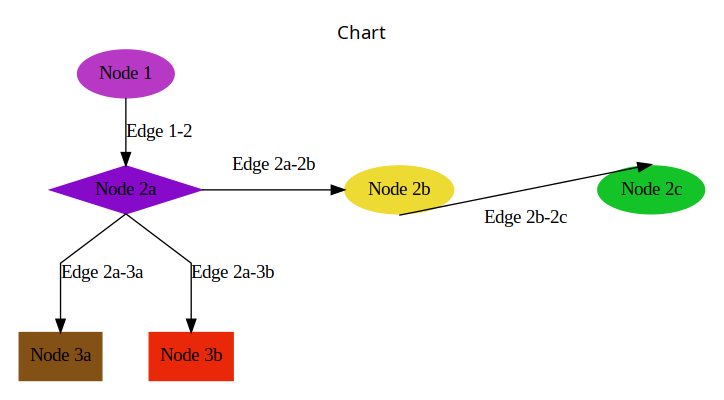

In [ ]:
# 1. Import dependencies.
import random
import uuid
import pydot
from pydot_flow import Node, Chart
from IPython.display import Image, display


# 2. Define a function for creating a random color code.
def random_color():
    "Generate a random color."
    return "#" + hex(random.randint(0, 0xFFFFFF))[2:].rjust(6, "0")


# 3. Create a Pydot flow Chart.
chart = Chart(
    rankdir="TB",
    splines="false",
    label="Chart",
    labelloc="t",
    fontname="Sans",
    pad=0.2,
)

# 4. Create the first Node and name it Node 1.
node_1 = chart.create_node(
    src_node_attrs={"label": "Node 1", "color": random_color(), "style": "filled"}
)

# 5. Flow south from Node 1 to Node 2a.
node_2a = node_1.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 2a",
        "shape": "diamond",
        "color": random_color(),
        "style": "filled",
    },
    edge_attrs={"label": "Edge 1-2"},
)

# 6. Flow east from Node 2a to Node 2b; specify a `subgraph` with same rank.
node_2b = node_2a.flow(
    src_port="e",
    dst_node_attrs={
        "label": "Node 2b",
        "color": random_color(),
        "style": "filled",
    },
    edge_attrs={"label": "Edge 2a-2b", "minlen": 3},
    subgraph=pydot.Subgraph(str(uuid.uuid4()), rank="same"),
)

node_2b.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 2c",
        "color": random_color(),
        "style": "filled",
    },
    edge_attrs={"label": "Edge 2b-2c", "minlen": 3},
    subgraph=pydot.Subgraph(str(uuid.uuid4())),
)

# 7. Return to Node 2a and flow south to Node 3a.
node_3a = node_2a.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3a",
        "shape": "box",
        "color": random_color(),
        "style": "filled",
    },
    edge_attrs={
        "label": "Edge 2a-3a",
        "minlen": 2,
        "labeldistance": 2,
    },
)

# 8. Return again to Node 2a and flow south to Node 3b.
node_3b = node_2a.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3b",
        "shape": "box",
        "color": random_color(),
        "style": "filled",
    },
    edge_attrs={"label": "Edge 2a-3b", "minlen": 2},
)

# 9. Save the graph image to a file.
# chart.graph.write_png("../output.png")

# 10. Output an image in a Jupyter Notebook.
Image(chart.graph.create_png())

False


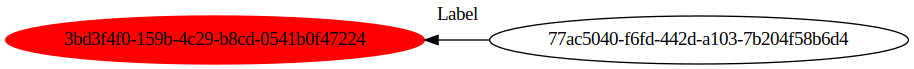

In [1]:
import pydot
import uuid
from IPython.display import Image, display

graph = pydot.Dot(rankdir="TB", splines="false")

node_1 = pydot.Node(str(uuid.uuid4()), fillcolor="blue")

# graph.add_node(node_1)

node_2 = pydot.Node(str(uuid.uuid4()), color="red", style="filled")

subgraph = pydot.Subgraph(rank="same")
subgraph.add_node(node_1)
subgraph.add_node(node_2)
edge = pydot.Edge(
    src=node_2.get_name() + ":e",
    dst=node_1.get_name() + ":w",
    dir="back",
    label="Label",
)
subgraph.add_edge(edge)
graph.add_subgraph(subgraph)

print(any([_subgraph.get_name() == "TEST" for _subgraph in graph.get_subgraph_list()]))

Image(graph.create_png())